# 6.5 Unsupervised Machine Learning: Clustering

## Contents:

1. Import Libraries
2. Import Datasets
3. Create Subset
4. The Elbow Technique
5. k-means Clustering

## 1. Import Libraries

In [809]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

## 2. Import Datasets

In [811]:
# import datasets

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Data Immersion/A6, Advanced Analythics & Dashboard Design/Achievement 6/09-2024 SA Road Crash Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'))

## 3. Create Subset

In [813]:
df.columns

Index(['Unnamed: 0', 'REPORT_ID', 'crash_stats_area', 'crash_suburb',
       'crash_postcode', 'total_units', 'total_casualties', 'total_fatalities',
       'total_serious_injuries', 'total_minor_injuries', 'crash_month',
       'crash_day', 'crash_time', 'area_speed', 'moisture_conditions',
       'weather_conditions', 'crash_time_of_day', 'unit_responsible',
       'dui_involved', 'drugs_involved', 'accloc_x', 'accloc_y', 'unit_type',
       'unit_registration_year', 'unit_controller_sex', 'unit_controller_age',
       'unit_controller_licence_type', 'unit_number_of_occupants'],
      dtype='object')

In [814]:
df.shape

(63069, 28)

In [815]:
# drop Unnamed: 0 column

df.drop(columns='Unnamed: 0', inplace=True)

In [816]:
df.head()

,REPORT_ID,crash_stats_area,crash_suburb,crash_postcode,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,crash_month,...,dui_involved,drugs_involved,accloc_x,accloc_y,unit_type,unit_registration_year,unit_controller_sex,unit_controller_age,unit_controller_licence_type,unit_number_of_occupants
0,2019-1-16/08/2024,2 Metropolitan,Hampstead Gardens,5086,2,0,0,0,0,June,...,N,N,1331810.03,1676603.26,Station Wagon,1998.0,Female,85.0,Full,1.0
1,2019-2-16/08/2024,2 Metropolitan,Dry Creek,5094,2,0,0,0,0,January,...,N,N,1328376.20,1682942.63,Motor Cars - Sedan,2002.0,Female,31.0,Full,1.0
2,2019-3-16/08/2024,2 Metropolitan,Mile End,5031,2,1,0,0,1,January,...,N,N,1325819.68,1670994.26,Motor Vehicle - Type Unknown,1999.0,Unknown,95.0,Unknown,1.0
3,2019-4-16/08/2024,2 Metropolitan,Paralowie,5108,2,1,0,1,0,January,...,N,N,1328320.60,1690237.08,Motor Cycle,2015.0,Male,21.0,Learners,1.0
4,2019-5-16/08/2024,2 Metropolitan,Mount Barker,5251,2,0,0,0,0,January,...,N,N,1353279.99,1655645.15,NaN,NaN,NaN,NaN,NaN,NaN


In [817]:
# check for missing values

df.isna().sum()

REPORT_ID                          0
crash_stats_area                   0
crash_suburb                       0
crash_postcode                     0
total_units                        0
total_casualties                   0
total_fatalities                   0
total_serious_injuries             0
total_minor_injuries               0
crash_month                        0
crash_day                          0
crash_time                         0
area_speed                         0
moisture_conditions                0
weather_conditions                 0
crash_time_of_day                  0
unit_responsible                   0
dui_involved                       0
drugs_involved                     0
accloc_x                           0
accloc_y                           0
unit_type                       3693
unit_registration_year          3693
unit_controller_sex             3693
unit_controller_age             3693
unit_controller_licence_type    3693
unit_number_of_occupants        3693
d

In [818]:
# drop missing values

df_subset = df.dropna()

In [819]:
# create subset without cathegorical variables and unneeded columns

df_subset = df_subset[['total_units', 'total_casualties', 'total_fatalities', 'total_serious_injuries', 'total_minor_injuries', 'area_speed', 'unit_registration_year', 'unit_controller_age', 'unit_number_of_occupants']]

In [820]:
# check shape of subset

df_subset.shape

(59376, 9)

## 4. The Elbow Technique

In [822]:
# define range of potential clusters in the data

num_cl = range(1, 10) 

# define k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [823]:
# Create score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))]

score

[-52511186.40580368,
 -28293379.083416015,
 -18086526.400230035,
 -13713375.424534373,
 -11210184.130724741,
 -10540915.350383636,
 -8760917.485862236,
 -8548636.720072407,
 -7953677.477480235]

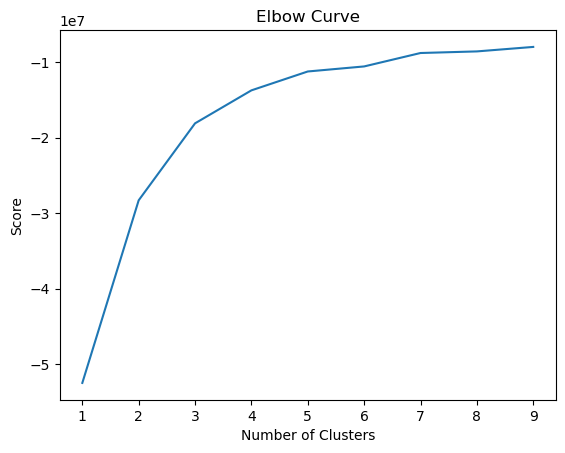

In [824]:
# plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 5. k-means Clustering

In [826]:
# reate the k-means object

kmeans = KMeans(n_clusters = 4)

In [828]:
# fit the k-means object to the data

kmeans.fit(df_subset)

KMeans(n_clusters=4)

In [829]:
# create clusters column and fit the k-means clustering model to the dataframe

df_subset.loc[:, 'clusters'] = kmeans.fit_predict(df_subset)

In [830]:
df_subset.head()

,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,area_speed,unit_registration_year,unit_controller_age,unit_number_of_occupants,clusters
0,2,0,0,0,0,60,1998.0,85.0,1.0,2
1,2,0,0,0,0,90,2002.0,31.0,1.0,3
2,2,1,0,0,1,60,1999.0,95.0,1.0,2
3,2,1,0,1,0,50,2015.0,21.0,1.0,1
5,2,1,0,0,1,50,2002.0,26.0,1.0,1


In [831]:
# check number of observations in each cluster value

df_subset['clusters'].value_counts()

clusters
1    24742
0    14982
3    10675
2     8977
Name: count, dtype: int64

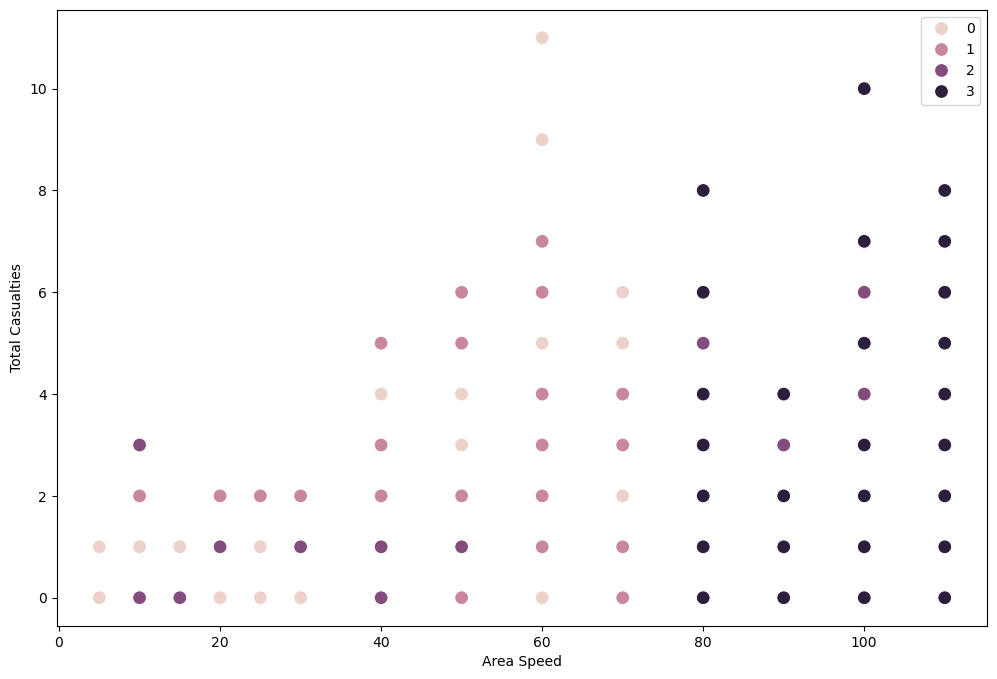

In [832]:
# plot the clusters for the 'total_casualties' and 'area_speed' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['area_speed'], y=df_subset['total_casualties'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Area Speed')
plt.ylabel('Total Casualties')
plt.show()

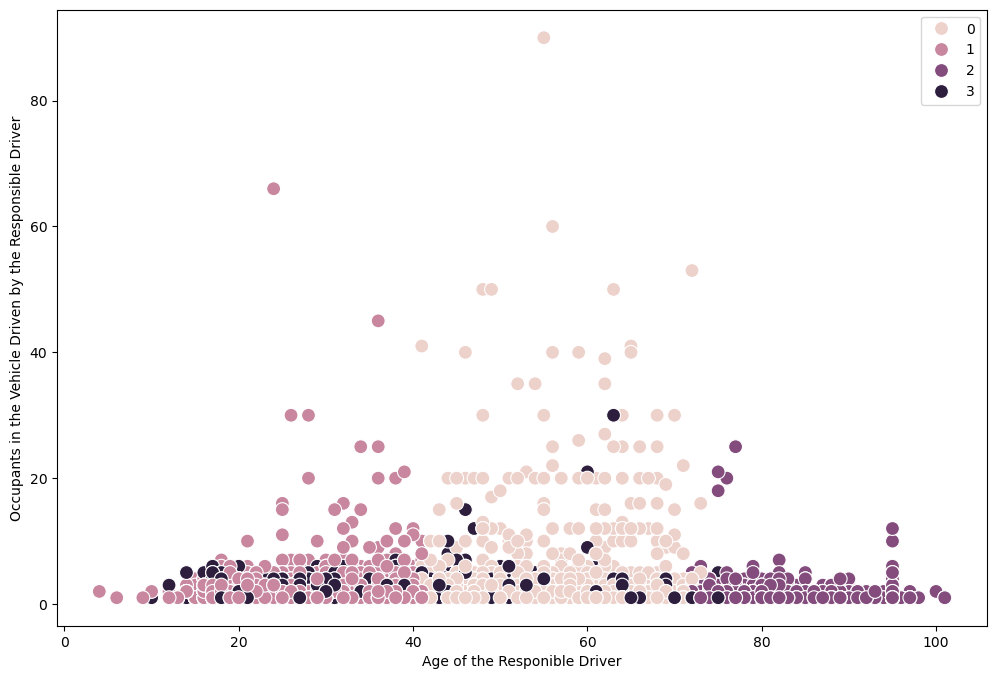

In [833]:
# plot the clusters for the 'unit_controller_age' and 'unit_number_of_occupants' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['unit_controller_age'], y=df_subset['unit_number_of_occupants'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Age of the Responible Driver')
plt.ylabel('Occupants in the Vehicle Driven by the Responsible Driver')
plt.show()

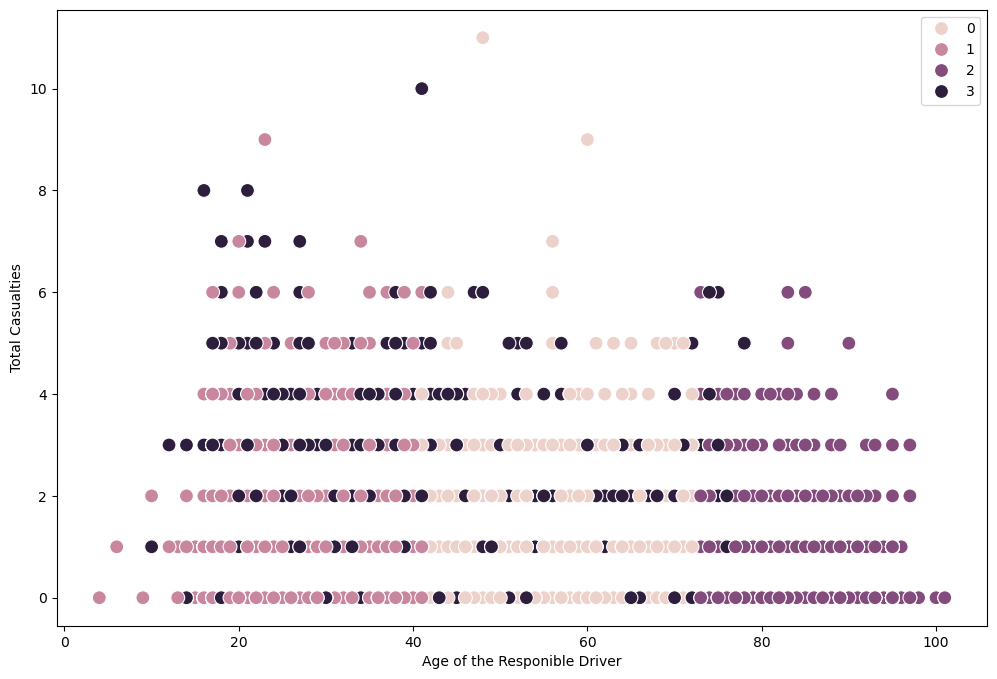

In [834]:
# plot the clusters for the 'unit_controller_age' and 'total_casualties' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['unit_controller_age'], y=df_subset['total_casualties'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Age of the Responible Driver')
plt.ylabel('Total Casualties')
plt.show()

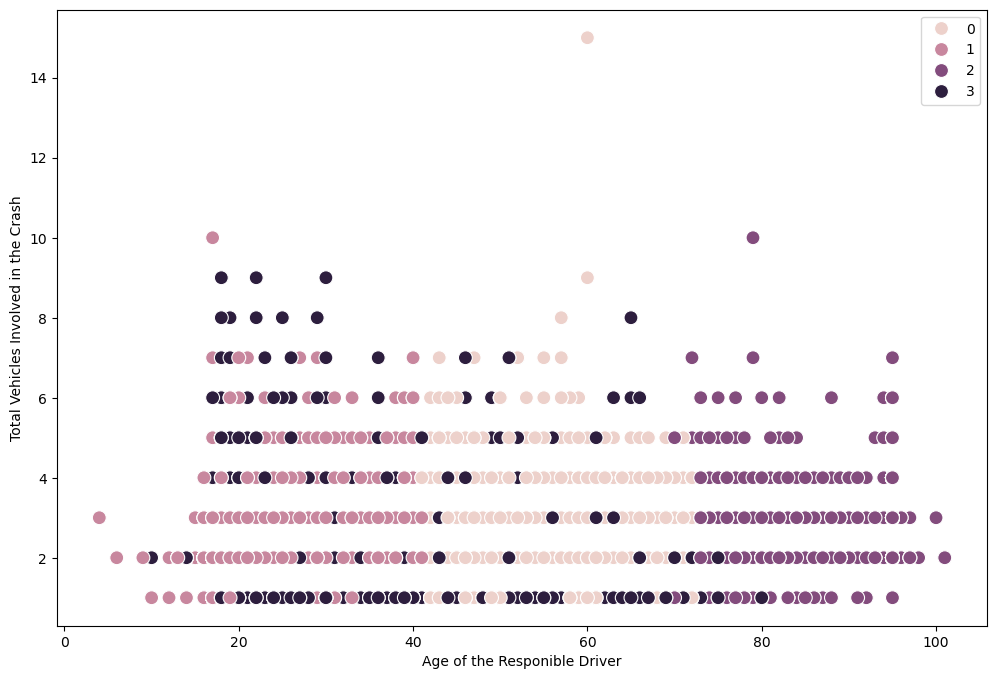

In [835]:
# plot the clusters for the 'unit_controller_age' and 'total_units' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['unit_controller_age'], y=df_subset['total_units'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Age of the Responible Driver')
plt.ylabel('Total Vehicles Involved in the Crash')
plt.show()

In [837]:
# separate the data points in each cluster

df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'black'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'pink'

In [838]:
# calculate the descriptive statistics for each cluster

df_subset.groupby('cluster').agg({
    'total_units': ['mean', 'median'],
    'total_casualties': ['mean', 'median'],
    'total_fatalities': ['mean', 'median'],
    'total_serious_injuries': ['mean', 'median'],
    'total_minor_injuries': ['mean', 'median'],
    'area_speed': ['mean', 'median'],
    'unit_registration_year': ['mean', 'median'],
    'unit_controller_age': ['mean', 'median'],
    'unit_number_of_occupants': ['mean', 'median']
})

total_units        total_casualties        total_fatalities  \
                   mean median             mean median             mean   
cluster                                                                   
black          2.043934    2.0         0.555597    0.0         0.025386   
dark purple    2.160521    2.0         0.341317    0.0         0.005347   
pink           2.152917    2.0         0.368042    0.0         0.003271   
purple         2.183696    2.0         0.356479    0.0         0.002546   

                   total_serious_injuries        total_minor_injuries         \
            median                   mean median                 mean median   
cluster                                                                        
black          0.0               0.131803    0.0             0.398407    0.0   
dark purple    0.0               0.038320    0.0             0.297650    0.0   
pink           0.0               0.044854    0.0             0.319917    0.0   
purple         0.0               0.036982    0.0             0.316951    0.0   

            area_speed        unit_registration_year          \
                  mean median                   mean  median   
cluster                                                        
black        93.498829  100.0            2007.700984  2008.0   
dark purple  59.604545   60.0            2005.220452  2004.0   
pink         57.569417   60.0            2010.075691  2011.0   
purple       56.814324   60.0            2008.783162  2009.0   

            unit_controller_age        unit_number_of_occupants         
                           mean median                     mean median  
cluster                                                                 
black                 34.704637   30.0                 1.381358    1.0  
dark purple           88.179236   95.0                 1.158516    1.0  
pink                  54.624683   54.0                 1.437792    1.0  
purple                26.963463   26.0                 1.359470    1.0